In [247]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.metrics import mean_absolute_error as mae 

In [248]:
# read data into a DataFrame
data = pd.read_csv('nyc-rolling-sales.csv')

In [249]:
!pip install pandas_profiling

In [250]:
import pandas_profiling as pp

In [251]:
report = pp.ProfileReport(data)
report.to_file('data_assessment.html')

In [252]:
data.head()

,Unnamed_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**CLEAN DATA**

In [253]:
data['SALE_PRICE'].head()

0    6625000
1        -  
2        -  
3    3936272
4    8000000
Name: SALE_PRICE, dtype: object

In [254]:
data['SALE_PRICE'] = pd.to_numeric(data['SALE_PRICE'], errors = 'coerce') # converts a data to numeric

In [255]:
data['SALE_PRICE'].head()

0    6625000.0
1          NaN
2          NaN
3    3936272.0
4    8000000.0
Name: SALE_PRICE, dtype: float64

In [256]:
data['SALE_PRICE'].isna().sum() # to count the null values

14561

In [257]:
data['SALE_PRICE'] = data['SALE_PRICE'].fillna(0) # updates all null values to zero (0)
data['SALE_PRICE'].isna().sum() # this should be equal to zero since all null have been transformed to 0 values

0

In [258]:
data['GROSS_SQUARE_FEET'].head()

0     6440
1    18690
2     7803
3     6794
4     4615
Name: GROSS_SQUARE_FEET, dtype: object

In [259]:
data['GROSS_SQUARE_FEET'] = pd.to_numeric(data['GROSS_SQUARE_FEET'], errors = 'coerce')
data['GROSS_SQUARE_FEET'].head()

0     6440.0
1    18690.0
2     7803.0
3     6794.0
4     4615.0
Name: GROSS_SQUARE_FEET, dtype: float64

In [260]:
data['LAND_SQUARE_FEET'].head()

0    1633
1    4616
2    2212
3    2272
4    2369
Name: LAND_SQUARE_FEET, dtype: object

In [261]:
data['LAND_SQUARE_FEET'] = pd.to_numeric(data['LAND_SQUARE_FEET'], errors = 'coerce')
data['LAND_SQUARE_FEET'].head()

0    1633.0
1    4616.0
2    2212.0
3    2272.0
4    2369.0
Name: LAND_SQUARE_FEET, dtype: float64

In [262]:
data['GROSS_SQUARE_FEET'].isna().sum() 
data['LAND_SQUARE_FEET'].isna().sum() 

26252

In [263]:
# data['GROSS_SQUARE_FEET'] = data['LAND_SQUARE_FEET'].fillna(0)
# data['LAND_SQUARE_FEET'] = data['LAND_SQUARE_FEET'].fillna(0)

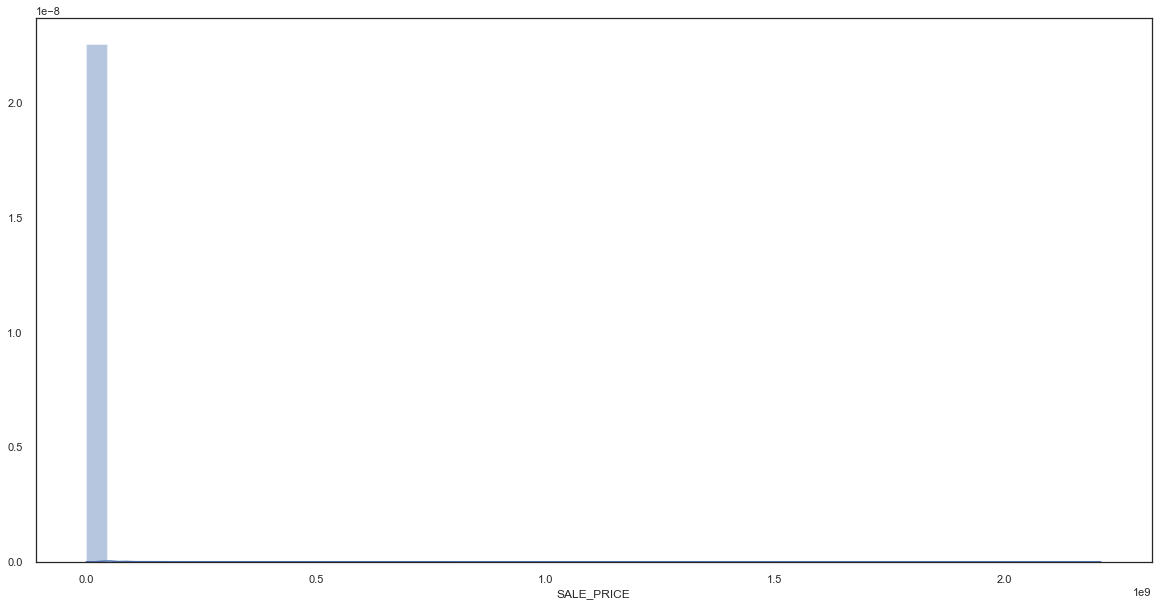

In [264]:
sns.distplot(data['SALE_PRICE'])

In [265]:
# remove rows in data where Sale Price is 0 to 10k
# data = data[data['SALE_PRICE'] > 10000]

In [266]:
data.dtypes

Unnamed_0                           int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING_CLASS_CATEGORY            object
TAX_CLASS_AT_PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING_CLASS_AT_PRESENT          object
ADDRESS                            object
APARTMENT_NUMBER                   object
ZIP_CODE                            int64
RESIDENTIAL_UNITS                   int64
COMMERCIAL_UNITS                    int64
TOTAL_UNITS                         int64
LAND_SQUARE_FEET                  float64
GROSS_SQUARE_FEET                 float64
YEAR_BUILT                          int64
TAX_CLASS_AT_TIME_OF_SALE           int64
BUILDING_CLASS_AT_TIME_OF_SALE     object
SALE_PRICE                        float64
SALE_DATE                          object
dtype: object

In [267]:
#Convert to date
data['SALE_DATE'] = pd.to_datetime(data['SALE_DATE'], errors='coerce')

In [268]:
#Remove 5th and 95th percentile tails
zero = 0
fifth = data['SALE_PRICE'].describe(np.arange(0.05, 1, 0.05)).T['15%']
ninetyfifth = data['SALE_PRICE'].describe(np.arange(0.05, 1, 0.05)).T['95%']
data = data[(data['SALE_PRICE'] > zero) & (data['SALE_PRICE'] <= ninetyfifth)].copy()

data.dropna(inplace = True)

In [291]:
data.shape

(36128, 22)

In [292]:
#set variables
dependent = ['SALE_PRICE']
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT','BUILDING_CLASS_AT_TIME_OF_SALE']
counts = ['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']

**FEATURE ENGINEERING**

In [293]:
#DUMMY VARIABLES: MULTIHOT ENCODING
df_cat = pd.get_dummies(data[categorical].astype(str))

#Reassigning numerical to different df
df_cnt = data[counts]


**FEATURE SELECTION AND TRAIN - TEST SPLIT**

In [350]:
#Define Features: Concatenate the features set above
Features = pd.concat([df_cat, df_cnt], axis = 1)

# Features.head()
# Set X and y
X = Features
y = data[dependent]

In [351]:
X.head()

,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,NEIGHBORHOOD_AIRPORT LA GUARDIA,NEIGHBORHOOD_ANNADALE,NEIGHBORHOOD_ARDEN HEIGHTS,NEIGHBORHOOD_ARROCHAR,NEIGHBORHOOD_ARROCHAR-SHORE ACRES,...,BUILDING_CLASS_AT_TIME_OF_SALE_W4,BUILDING_CLASS_AT_TIME_OF_SALE_W8,BUILDING_CLASS_AT_TIME_OF_SALE_W9,BUILDING_CLASS_AT_TIME_OF_SALE_Y1,BUILDING_CLASS_AT_TIME_OF_SALE_Z0,BUILDING_CLASS_AT_TIME_OF_SALE_Z9,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1588.0,5653.0
208,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1588.0,5653.0
209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1588.0,5653.0
222,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,1566.0,6330.0
223,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,1566.0,6330.0


In [352]:
#Correlation
# df_cnt.corr().style.background_gradient('twilight_shifted', axis = None)
df_cnt.corr()

,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
RESIDENTIAL_UNITS,1.000000,0.009171,0.654991,0.870247
COMMERCIAL_UNITS,0.009171,1.000000,0.029186,0.023776
LAND_SQUARE_FEET,0.654991,0.029186,1.000000,0.791965
GROSS_SQUARE_FEET,0.870247,0.023776,0.791965,1.000000


In [353]:
X.shape, y.shape

((36128, 560), (36128, 1))

In [354]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

**LINEAR REGRESSION**

In [355]:
# Initialize model
model = LinearRegression() 

In [356]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [358]:
# print coefficient
coefficient

array([[-2.55303156e+06,  8.98765231e+11, -7.71929446e+11,
        -7.71928195e+11, -7.71928511e+11,  2.57640151e+11,
         2.57640289e+11,  2.57640188e+11,  2.57640322e+11,
         2.57640145e+11,  2.57639720e+11,  2.57640350e+11,
         2.57641594e+11, -1.41305347e+12,  2.57641622e+11,
        -1.41305363e+12,  2.57640298e+11, -1.41305345e+12,
         2.57641709e+11,  2.57640360e+11,  2.57640240e+11,
         2.57639954e+11, -1.41305358e+12,  2.57641664e+11,
         2.57641311e+11,  2.57642141e+11,  2.57641693e+11,
         2.57640104e+11,  2.57641585e+11,  2.57639702e+11,
        -1.41305353e+12, -1.41305356e+12,  2.57642359e+11,
         2.57641090e+11,  2.57640223e+11,  2.57641387e+11,
         2.57641484e+11,  2.57639816e+11,  2.57641141e+11,
         2.57642414e+11, -1.41305359e+12,  2.57640271e+11,
        -5.14286349e+11, -5.14284889e+11, -1.41305340e+12,
        -1.41305323e+12, -5.14287050e+11,  2.57641960e+11,
         2.57640261e+11, -1.41305469e+12,  2.57642061e+1

In [359]:
# print intercept
intercept

array([4.96567302e+11])

In [360]:
# calculate the R-squared
model.score(X_test, y_test)

-526819396.49761206

In [361]:
y_predicted = model.predict(X_test)

In [362]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(Features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,BOROUGH_1,"[-2553031557.202231, 898765230809281.2, -77192..."


In [363]:
# Root mean squared error
linear_rmse = np.sqrt(mse(y_predicted, y_test)) 
linear_rmse

11548036917.471104

**RIDGE REGRESSION**

In [364]:
from sklearn.linear_model import Ridge
n_samples, n_features = 36128, 560
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [365]:
# get coefficients
coefficient = model_ridge.coef_

# get intercept
intercept = model_ridge.intercept_

coefficient

array([[-4.09691787e+04, -1.67328974e+05,  3.30701011e+05,
         4.62649503e+04, -1.68667808e+05,  2.59987029e+04,
         6.92120783e+04, -2.90614840e+04,  9.77426633e+04,
        -6.54662019e+04, -3.91032152e+05,  2.32875455e+05,
        -5.93264571e+04,  5.16488467e+04, -2.99985379e+04,
        -1.11316170e+05,  1.80719402e+05,  7.28787430e+04,
         5.57667335e+04,  2.32970587e+05,  1.24780010e+05,
        -1.60843963e+05, -4.80771011e+04,  1.04443622e+04,
        -3.36892009e+05,  4.72345218e+05,  3.81457448e+04,
        -1.21372435e+04, -7.53082389e+04, -3.95795092e+05,
        -4.53921580e+03, -3.67033806e+04,  6.93318402e+05,
        -5.55281350e+05,  5.69933345e+03, -2.51980360e+05,
        -1.68999894e+05, -2.96166695e+05, -5.09309134e+05,
         7.45313488e+05, -6.10632104e+04,  4.87420566e+04,
        -5.25372231e+05,  5.46310861e+05,  1.16017856e+05,
         1.46215174e+05, -9.02852509e+05,  3.01837460e+05,
         4.18861534e+04, -5.71211427e+05,  3.94584216e+0

In [366]:
intercept

array([574252.393962])

In [367]:
# calculate the R-squared
model_ridge.score(X_test, y_test)

-3.8830089485428596

In [368]:
y_predicted = model_ridge.predict(X_test)

In [369]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,BOROUGH_1,"[-2553031557.202231, 898765230809281.2, -77192..."


In [370]:
ridge_rmse=np.sqrt(mse(y_predicted, y_test)) # Root mean squared error
ridge_rmse

1111785.6008198573

**LASSO**

In [371]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha = 0.1)
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [372]:
# get coefficients
coefficient = model_lasso.coef_

# get intercept
intercept = model_lasso.intercept_

coefficient

array([-1.31965237e+04, -2.61089335e+05,  1.68878189e+05,  1.02126672e+05,
       -2.28448347e+05, -6.16153260e+04,  8.86710980e+04, -1.12560734e+04,
        1.22251895e+05, -5.41114684e+04, -4.93603876e+05,  1.36291482e+05,
        6.21813714e+04,  1.01407000e+05,  9.03732562e+04, -5.99562555e+04,
        8.40684463e+04,  1.27620433e+05,  1.77730329e+05,  1.45665233e+05,
        2.88551628e+04, -2.60002587e+05, -3.81251052e+03,  1.32154975e+05,
       -2.20381112e+05,  6.09810387e+05,  1.61657108e+05, -1.10134719e+05,
        5.20661876e+04, -5.11486139e+05,  3.95339392e+04,  1.51883261e+04,
        8.28099068e+05, -4.41072813e+05,  2.36934234e+04, -1.43910791e+05,
       -4.70301174e+04, -3.97705416e+05, -3.90458665e+05,  8.82058610e+05,
       -1.02433977e+04,  6.88626112e+04, -8.06005994e+05,  6.53186153e+05,
        1.72178753e+05,  3.41845848e+05, -1.50543709e+06,  4.28200272e+05,
        6.12738290e+04, -1.10801906e+06,  5.29863840e+05,  4.46389153e+05,
       -5.93904829e+04, -

In [373]:
intercept

array([576547.87969717])

In [374]:
# calculate the R-squared
model_lasso.score(X_test, y_test)

-6.382360102373092

In [375]:
y_predicted = model_lasso.predict(X_test)

In [376]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,BOROUGH_1,"[-2553031557.202231, 898765230809281.2, -77192..."


In [377]:
lasso_rmse=np.sqrt(mse(y_predicted, y_test)) # Root mean squared error
lasso_rmse

1367020.0922091128

**ELASTIC NET**

In [378]:
from sklearn.linear_model import ElasticNet
model_elasticnet = ElasticNet(random_state = 0) 
model_elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [379]:
# get coefficients
coefficient = model_elasticnet.coef_

# get intercept
intercept = model_elasticnet.intercept_

coefficient

array([ 7.40873781e+03, -5.22050128e+04,  7.22797204e+04,  3.31682565e+03,
       -3.08012711e+04,  3.92110726e+01, -1.44467778e+02, -2.32802904e+03,
       -1.74799385e+01, -9.68694763e+01, -2.35094867e+03,  6.40091792e+03,
        5.49541056e+02,  2.50744616e+02,  5.20120793e+02, -3.48405025e+03,
        5.60021843e+03, -1.32160359e+03,  1.16764073e+04,  5.86372301e+02,
        7.64436434e+02, -7.65165290e+02, -1.58633040e+02,  4.49457725e+03,
       -1.05216532e+03,  3.85973137e+03,  6.52004079e+03,  1.35732503e+02,
       -1.85220229e+03, -7.58372464e+02, -5.48166657e+00, -3.33373539e+03,
        6.79312620e+03, -1.95763758e+03, -1.62256107e+03, -3.99747921e+01,
        2.06671914e+03, -1.87250729e+03, -8.07977213e+03,  4.57778609e+03,
       -1.06238948e+03, -4.07523157e+02, -1.33877587e+02,  2.97686870e+02,
       -3.92648768e+02,  1.28993959e+01, -1.43172361e+02,  4.32901759e+03,
       -2.10042612e+02, -5.38789166e+01,  3.57385283e+02,  8.02906496e+02,
        1.64883795e+03, -

In [380]:
intercept

array([711055.78202067])

In [381]:
# calculate the R-squared
model_elasticnet.score(X_test, y_test)

-2.3709344566968285

In [382]:
y_predicted = model_elasticnet.predict(X_test)

In [383]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,BOROUGH_1,"[-2553031557.202231, 898765230809281.2, -77192..."


In [384]:
elasticnet_rmse=np.sqrt(mse(y_predicted, y_test)) # Root mean squared error
elasticnet_rmse

923745.7198112588

**RMSE**

In [386]:
RMSE = pd.DataFrame((list(zip(["Linear","Ridge","Lasso","ElasticNet"], [linear_rmse,ridge_rmse,lasso_rmse,elasticnet_rmse]))), columns = ['Models', 'RMSE'])
RMSE

,Models,RMSE
0,Linear,1.154804e+10
1,Ridge,1.111786e+06
2,Lasso,1.367020e+06
3,ElasticNet,9.237457e+05


--> **ELASTICNET REGRESSION MODEL HAS THE LEAST RMSE**
(But I know this seems to be incorrect. I'm still in the process of understanding all of these. Apologies, huhu)